# Assignment 1

## 1. Theory

#### 1.

###### a)

In [5]:
import numpy as np

In [15]:
X = np.array([[-2], [-5], [-3], [0], [-8], [-2], [1], [5], [-1], [6]])
X = np.c_[np.ones(len(X)),X].astype(int)
X = np.array(X)
Y = np.array([[1], [-4], [1], [3], [11], [5], [0], [-1], [3], [1]])
print(X)
print(Y)

[[ 1  1  1  1  1  1  1  1  1  1]
 [-2 -5 -3  0 -8 -2  1  5 -1  6]]
[[ 1]
 [-4]
 [ 1]
 [ 3]
 [11]
 [ 5]
 [ 0]
 [-1]
 [ 3]
 [ 1]]


In [19]:
np.linalg.inv(X.T @ X) @ X.T @ Y

array([[ 1.62523306],
       [-0.41640771]])

##### b)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression().fit(X, Y)
print(reg.coef_)
print(reg.intercept_)

[[ 0.         -0.41640771]]
[1.62523306]


#### 2.

##### a)

In [22]:
from sympy import symbols, diff

In [25]:
x1, x2 = symbols('x1 x2', real=True)
f = (x1 + x2 -2)**2
diff(f,x1)

2*x1 + 2*x2 - 4

##### b)

In [2]:
import matplotlib as plt

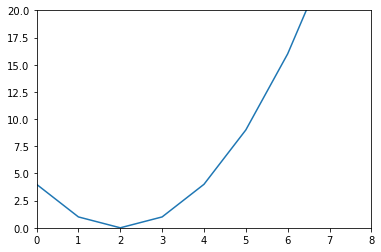

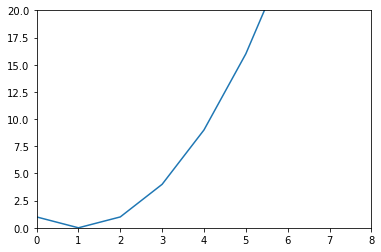

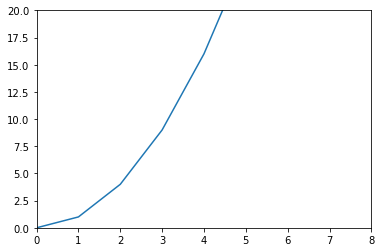

In [34]:
def graph(formula):
    x1 = np.array(range(0, 20))
    J = eval(formula)
    plt.plot(x1,J)
    plt.ylim(0, 20)
    plt.xlim(0,8)
    plt.show()
    
# x2 = 0
#J = (x1 - 2)**2
graph('(x1 - 2)**2')

# x2 = 1
#J = (x1 - 1)**2
graph('(x1 - 1)**2')

# x2 = 2
#J = (x1)**2
graph('(x1)**2')

##### c)

In [ ]:
x1 + x2 - 2 = 0
x1 + x2 = 2
# This condition has to be true, so any value that satisfies
# this condition would minimise J

## 2. Closed Form Linear Regression

In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data

In [2]:
#1
df = pd.read_csv('x06Simple.csv')
del df['Index']

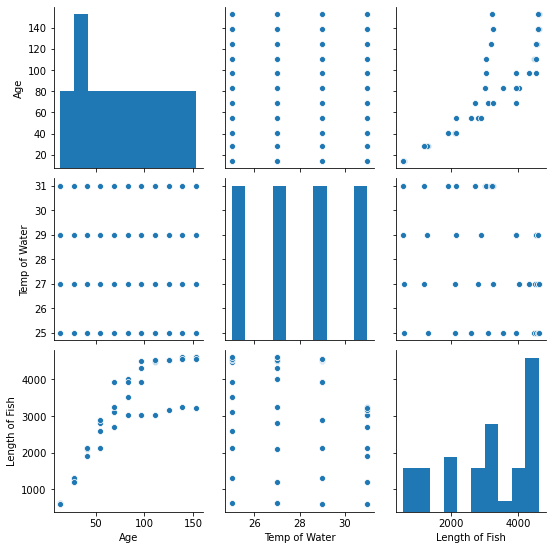

In [3]:
sb.pairplot(df)

In [4]:
#2
df = df.sample(frac=1)

In [5]:
#3
splt = np.random.rand(len(df)) < 0.67
train_df = df[splt]
test_df = df[~splt]

print(train_df)
print()
print(test_df)

    Age  Temp of Water  Length of Fish
24   41             29            2140
15   69             27            3255
30  125             29            4525
42  139             31            3257
43  153             31            3214
25   55             29            2890
21  153             27            4600
28   97             29            4515
13   41             27            2110
6    97             25            3935
8   125             25            4530
34   28             31            1205
38   83             31            3020
1    28             25            1315
35   41             31            1915
18  111             27            4495
20  139             27            4600
33   14             31             590
41  125             31            3180
7   111             25            4465
23   28             29            1305
39   97             31            3030
10  153             25            4600
26   69             29            3920
11   14             27   

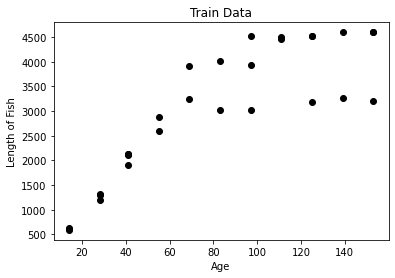

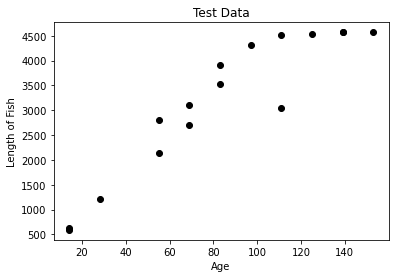

In [6]:
#4
from sklearn import preprocessing # I don't know any other way to standard
std = preprocessing.scale(train_df)

X_train = train_df['Age']
X_test = test_df['Age']
Y_train = train_df['Length of Fish']
Y_test = test_df['Length of Fish']


plt.scatter(X_train, Y_train, color='black')
plt.title('Train Data')
plt.xlabel('Age')
plt.ylabel('Length of Fish')
# plt.xticks(())
# plt.yticks(())
plt.show()

plt.scatter(X_test, Y_test, color='black')
plt.title('Test Data')
plt.xlabel('Age')
plt.ylabel('Length of Fish')
# plt.xticks(())
# plt.yticks(())
plt.show()

In [7]:
#5
X = np.c_[np.ones(len(X_train)),X_train].astype(int)
X = np.array(X)
Y = np.array(Y_train)

thetas = np.linalg.inv(X.T @ X) @ X.T @ Y
thetas

array([1055.11496434,   24.3748514 ])

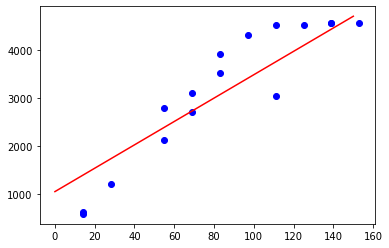

In [8]:
#6
def y_compute(x):
    return (thetas[1]*x) + thetas[0]
x1 = 0
x2 = 150
y1 = y_compute(x1)
y2 = y_compute(x2)

plt.plot(X_test, Y_test, 'bo')
plt.plot([x1,x2] ,[y1,y2], color='red')
plt.show()

In [9]:
#7
error_squared_sum = 0
for index, row in test_df[['Age', 'Length of Fish']].iterrows():
    x = row['Age']
    y_act = row['Length of Fish']
    y_pred = y_compute(x)
    error_squared = (y_act - y_pred)**2
    error_squared_sum += error_squared
#     print(x, y_act, y_pred)
    
mean_error_squared_sum = error_squared_sum / test_df.shape[0]
root_mean_error_squared_sum = mean_error_squared_sum**(0.5)
root_mean_error_squared_sum

557.9050239541843

3

## 3. Locally-Weighted Linear Regression

In [10]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb # I'm not using this for the assignment, this is just to get a feel for the data

In [11]:
#1
df = pd.read_csv('x06Simple.csv')
del df['Index']

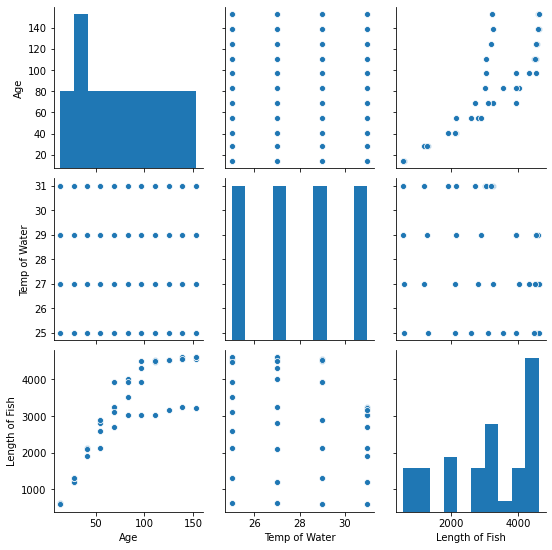

In [14]:
sb.pairplot(df)

In [15]:
#2
df = df.sample(frac=1)

In [16]:
#3
splt = np.random.rand(len(df)) < 0.67
train_df = df[splt]
test_df = df[~splt]

print(train_df)
print()
print(test_df)

    Age  Temp of Water  Length of Fish
8   125             25            4530
13   41             27            2110
27   83             29            3920
31  139             29            4565
26   69             29            3920
36   55             31            2140
12   28             27            1215
0    14             25             620
10  153             25            4600
41  125             31            3180
32  153             29            4566
19  125             27            4535
34   28             31            1205
7   111             25            4465
14   55             27            2805
40  111             31            3040
6    97             25            3935
16   83             27            4015
42  139             31            3257
23   28             29            1305
4    69             25            3110
17   97             27            4315
18  111             27            4495
21  153             27            4600
11   14             27   

In [17]:
#4
from sklearn import preprocessing # I don't know any other way to standard
std = preprocessing.scale(train_df)